# Unsupervised Learning Experiment

# For Fun!

In [1]:
# import packages


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("../../resources/HR_capstone_dataset.csv")

# Rename columns as needed
df0.rename(
    columns={
        "Department": "department",
        "Work_accident": "work_accident",
        "average_montly_hours": "average_monthly_hours",
        "time_spend_company": "tenure",
    },
    inplace=True,
)

# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()

# Determine the number of rows containing tenure outliers
q1 = df.tenure.quantile(0.25)
q3 = df.tenure.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

# remove tenure outliers - toggle this line to keep outliers
df = df[df['tenure'] <= upper_bound]

In [3]:
"""Encode categorical variables and split the data into training and testing sets"""

# copy the dataframe to avoid modifying the original
df_enc = df.copy()

# encode salary as ordinal
df_enc["salary"] = df_enc["salary"].map({"low": 0, "medium": 1, "high": 2})

# encode department as dummies
df_enc = pd.get_dummies(df_enc, columns=["department"])


In [4]:
# drop target and scale features
features = df_enc.drop(columns=["left"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

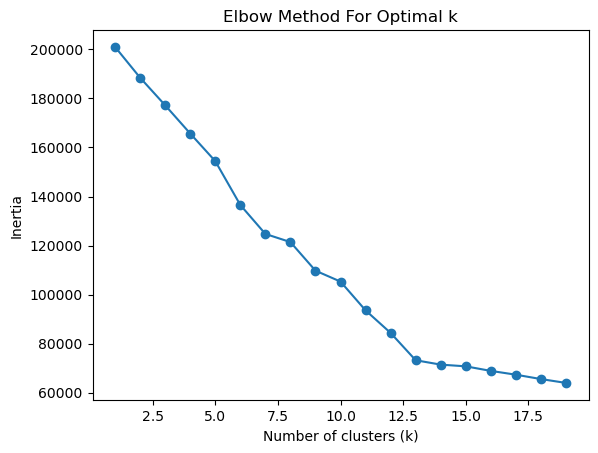

In [5]:
# find the elbow
inertia = []
K = range(1, 20)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [6]:
# run KMeans 11 with tenure outliers, 13 without
# kmeans = KMeans(n_clusters=11, random_state=42, n_init="auto")
kmeans = KMeans(n_clusters=13, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_scaled)

# add cluster labels to df
df_enc['cluster'] = clusters

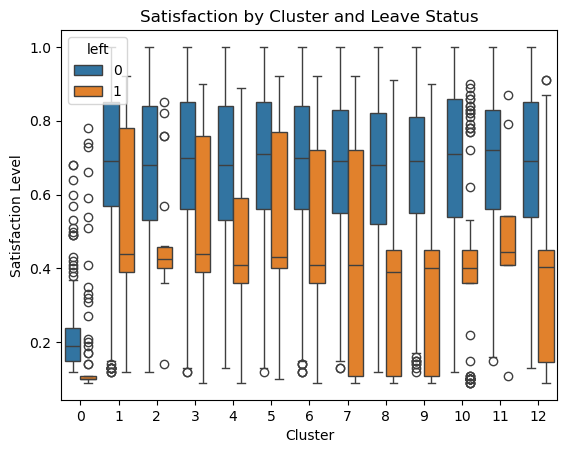

In [7]:
# boxplot of satisfaction level by cluster and leave status
sns.boxplot(x='cluster', y='satisfaction_level', hue='left', data=df_enc)
plt.xlabel('Cluster')
plt.ylabel('Satisfaction Level')
plt.title('Satisfaction by Cluster and Leave Status')
plt.show()

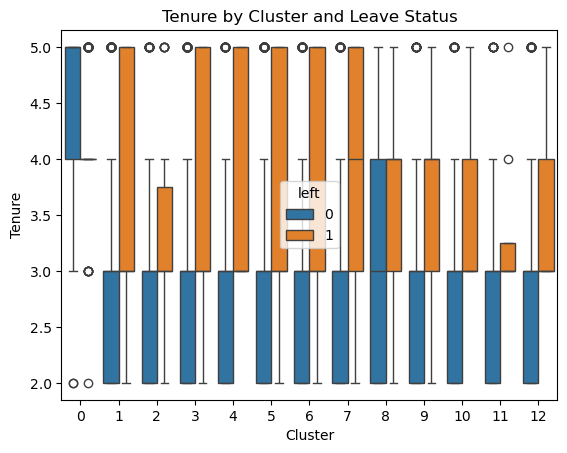

In [8]:
# boxplot of tenure by cluster and leave status
sns.boxplot(x='cluster', y='tenure', hue='left', data=df_enc)
plt.xlabel('Cluster')
plt.ylabel('Tenure')
plt.title('Tenure by Cluster and Leave Status')
plt.show()

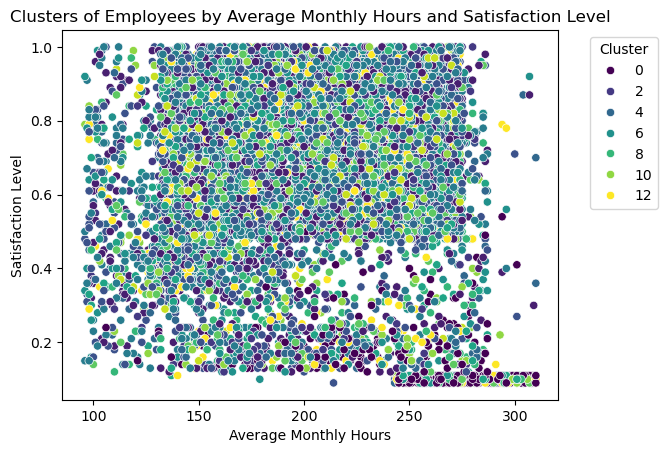

In [9]:
# visualize clusters
sns.scatterplot(x='average_monthly_hours', y='satisfaction_level', hue='cluster', data=df_enc, palette='viridis')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.title('Clusters of Employees by Average Monthly Hours and Satisfaction Level')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

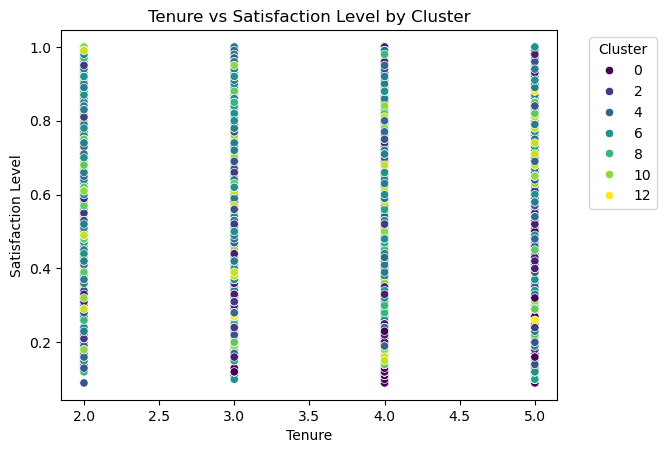

In [10]:
# tenure vs satisfaction level by cluster
sns.scatterplot(x='tenure', y='satisfaction_level', hue='cluster', data=df_enc, palette='viridis')
plt.xlabel('Tenure')
plt.ylabel('Satisfaction Level')
plt.title('Tenure vs Satisfaction Level by Cluster')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

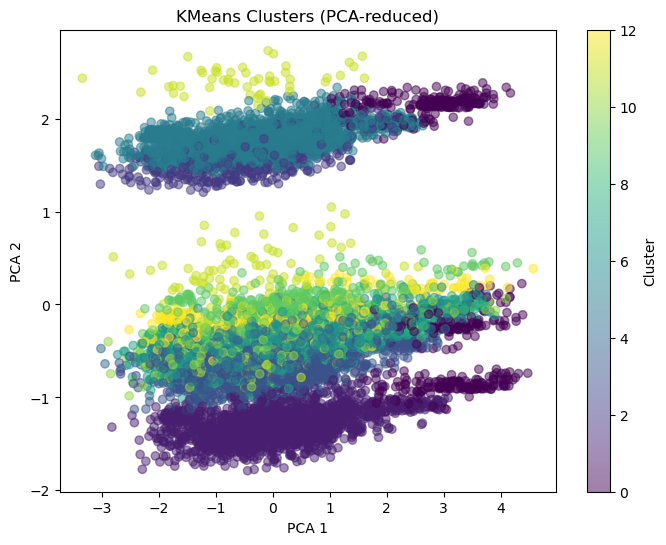

In [22]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_enc['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clusters (PCA-reduced)')
plt.colorbar(label='Cluster')
plt.show()

In an unsurprising twist, it doesn't look like clustering is helpful here. But I'll visit unsupervised learning again later, I'm sure